In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Serie de Fourier para peak
$$
f[x] = \sum_{k=0}^\infty a_k \cos[k \frac{2\pi}{T} x] + b_k \sin[k\frac{2\pi}{T}x]
$$
donde $T$ es el periodo de la onda

In [2]:
# definimos la funcion creando un domain
dx = 0.001
L = np.pi # limite superior e inferior [-pi, pi]
x = L * np.arange(-1, 1+dx, dx)
print("x:",x)

N = len(x)
print("using N:",N)

# el periodo seria
T = x[-1] - x[0]
print("T:", T, "= 2 pi")

x: [-3.14159265 -3.13845106 -3.13530947 ...  3.13530947  3.13845106
  3.14159265]
using N: 2001
T: 6.283185307179592 = 2 pi


N/4: 500


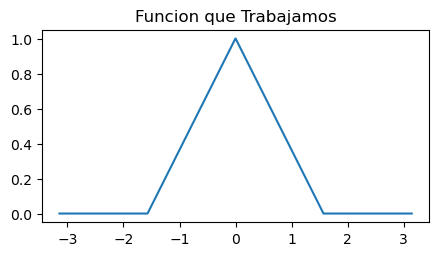

In [5]:
# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

f = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
# f[:Nquart] = 0 # el primer cuarto tiene 0's y el ultimo
f[Nquart:2*Nquart] = np.linspace(0,1,Nquart)
f[2*Nquart:3*Nquart] = np.linspace(1,0,Nquart)


# ------------
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,f)
plt.show()

## calcular la serie de Fourier
el producto interno usado para calcular coeficientes es $k \neq 0$,
$$
a_k =\frac{2}{T} \int_{t_0}^{t_0+T} f[x) \cos[\omega k x) dx
$$

para el caso $k=0$
$$
a_0 = \frac{1}{T} \int_{t_0}^{t_0+T} f[x) dx
$$

por tanto habremos de dividir por 2 en ese caso para hacer calzar los temas

donde $\omega = \frac{2\pi}{T}$

de donde viene el termino externo?
$$

$$

### la integral es discretizable a:
Vease el notebook adjunto `regla_trapezoidal.ipynb`
$$
\braket{f[x), \cos[\omega k x)} = \sum_{i=0}^{M} f_i \cdot \cos[\omega k x_i) \cdot dx
$$

donde $M$ es la cantidad de puntos que elegimos, puede estar $M \in ]0, N-1]$

In [6]:
omega = 2 * np.pi / T

In [7]:
# prodcto interno con algun coseno y la suma
# prueba k =0, k=1, k=4
# e interpreta los resultados
k = 1
# suma de riemman
np.sum(
    f * np.cos(omega * k * x) *  dx
)


0.4054583653848499

los coeficientes a calcular se guardan como un arreglo
$$ a_k = a[k]$$
podemos elegir un $M$ cualquiera, a mayor $M$ mas precision y mas calculos, desde cierto punto tendras una frecuencia: $\omega k $ bastante alta que se encargara de los detalles asi como de capturar ruido en el caso de que trabajes con data real

In [17]:
M = 30
a = np.zeros(M)
b = np.zeros(M)

for k in range(0,M):
    a[k] = np.sum( f * np.cos(omega * k * x) *  dx )
    b[k] = np.sum( f * np.sin(omega * k * x) *  dx )

a[0] = a[0] / 2 # el primer componene a_0 lleva 

print("a[k]:",a)

a[k]: [ 2.50000000e-01  4.05458365e-01  2.03047128e-01  4.53338432e-02
 -6.07153217e-18  1.61156326e-02  2.25596045e-02  8.37814869e-03
 -2.38524478e-18  4.94200177e-03  8.12060260e-03  3.41348971e-03
  3.36102673e-18  2.35321036e-03  4.14251027e-03  1.84672577e-03
  6.50521303e-18  1.36699738e-03  2.50543526e-03  1.15781778e-03
 -1.95156391e-18  8.89821822e-04  1.67675064e-03  7.94723658e-04
 -2.16840434e-19  6.23584481e-04  1.20013442e-03  5.80003970e-04
  2.17924637e-17  4.60224829e-04]


## rearmando la funcion
$$
f[x] = \sum_{k=0}^\infty a_k \cos[k \frac{2\pi}{T} x] + b_k \sin[k\frac{2\pi}{T}x]
$$

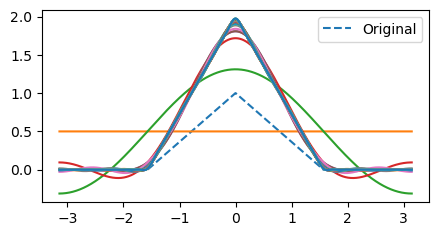

In [16]:
F = np.zeros_like(x)

fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, f, '--',label='Original')

for k in range(M):
    F += a[k] * np.cos( k * omega * x) + b[k] * np.sin( k * omega * x)
    plt.plot(x, F)

plt.legend()
plt.show()

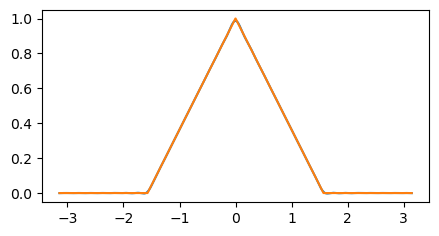

In [47]:
# probando el plot final
fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, F, label='Fourier')
plt.plot(x, f, label='Original')
plt.show()

# PlayGround

x: [-3.14159265 -3.13845106 -3.13530947 ...  3.13530947  3.13845106
  3.14159265]
using N: 2001
T: 6.283185307179592 = 2 pi
N/4: 500


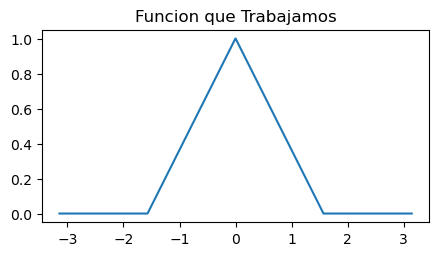

In [5]:
# definimos la funcion creando un domain
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dx = 0.001
L = np.pi # limite superior e inferior [-pi, pi]
x = L * np.arange(-1, 1+dx, dx)
print("x:",x)

N = len(x)
print("using N:",N)

# el periodo seria
T = x[-1] - x[0]
print("T:", T, "= 2 pi")
#del periodo viene omega que resume la informacion frecuencial
omega = 2 * np.pi / T

# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

f = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
# f[:Nquart] = 0 # el primer cuarto tiene 0's y el ultimo
f[Nquart:2*Nquart] = np.linspace(0,1,Nquart)
f[2*Nquart:3*Nquart] = np.linspace(1,0,Nquart)


# ------------ plot de la funcion usada
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,f)
plt.show()

a[k]: [ 2.50000000e-01  4.05458365e-01  2.03047128e-01  4.53338432e-02
 -6.07153217e-18  1.61156326e-02  2.25596045e-02  8.37814869e-03
 -2.38524478e-18  4.94200177e-03  8.12060260e-03  3.41348971e-03
  3.36102673e-18  2.35321036e-03  4.14251027e-03  1.84672577e-03
  6.50521303e-18  1.36699738e-03  2.50543526e-03  1.15781778e-03
 -1.95156391e-18  8.89821822e-04  1.67675064e-03  7.94723658e-04
 -2.16840434e-19  6.23584481e-04  1.20013442e-03  5.80003970e-04
  2.17924637e-17  4.60224829e-04]


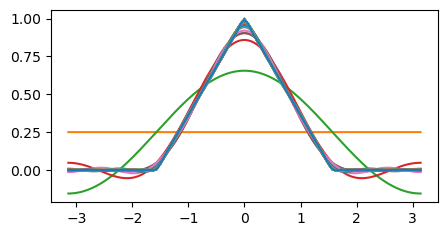

In [6]:
#  resolviendo con regla trapezoidal
M = 30
a = np.zeros(M)
b = np.zeros(M)

for k in range(0,M):
    a[k] = np.sum( f * np.cos(omega * k * x) *  dx )
    b[k] = np.sum( f * np.sin(omega * k * x) *  dx )

a[0] = a[0] / 2 # el primer componene a_0 lleva 

print("a[k]:",a)


# se realiza el plot con los coeficinetes
F = np.zeros_like(x)

fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, f, label='Original')

for k in range(M):
    F += a[k] * np.cos( k * omega * x) + b[k] * np.sin( k * omega * x)
    plt.plot(x, F)

plt.show()